In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA


In [13]:
Iris_data = pd.read_csv("Iris.csv")
Iris_data.head()

X = Iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalLengthCm']]
X = np.array(X)
pca = PCA(n_components=2)
X = pca.fit_transform(X)
y = Iris_data[['Species']]
y = preprocessing.LabelEncoder().fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print (X_train.shape)
print(Y_train.shape)

(120, 2)
(120,)


C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
Yhat = model.predict(X_test)
from sklearn import metrics
acc = metrics.accuracy_score(Yhat, Y_test)
print(acc)

0.9666666666666667


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [7]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.52177377, 0.47822623])

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=4)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(Y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy 0.9333333333333333


In [37]:
cleanup_nums = {"Species":     {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}}
Iris_data.replace(cleanup_nums, inplace=True)
Iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(Iris_data)
value_sc = sc.transform(Iris_data)

C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [40]:
X = Iris_data.loc[:,Iris_data.columns != 'Species']
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [41]:
y = Iris_data.loc[:,Iris_data.columns == 'Species']
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [63]:
from sklearn.model_selection import train_test_split
def generate():
    return train_test_split(X, y, test_size=0.25, random_state=1) 
X_train, X_test, y_train, y_test = generate()

In [64]:
print(X_train.shape)
print(y_train.shape)

(112, 5)
(112, 1)


In [65]:
print(X_test.shape)
print(y_test.shape)

(38, 5)
(38, 1)


In [66]:
from sklearn.ensemble import RandomForestClassifier
def generate():
    rfc = RandomForestClassifier(random_state =0)
    return rfc
rfc = generate()

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def generate():
    param_dist = {"max_depth": range(1,5),                               #  specify parameters and distributions to sample from
                  "min_samples_split": sp_randint(2, 11),
                  "min_samples_leaf": sp_randint(1, 11),
                  "bootstrap": [True, False],
                  "n_estimators": [100, 400, 700, 1000, 1500],
                  "criterion" : ["gini", "entropy"],
                  'max_features': ['sqrt', 'log2', None]
                 }

    n_iter_search = 50
    return RandomizedSearchCV(rfc,random_state = 0, param_distributions = param_dist,     # run randomized search
                             n_iter = n_iter_search,
                             n_jobs = -1)
rfc = generate()

In [68]:
import time
def generate():
    start_time = time.time()
    rfc.fit(X_train,y_train)
    end_time = time.time()
    time1 = end_time-start_time
    return time1
time1 = generate()

C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [69]:
print(time1)

21.79824948310852


In [70]:
predictions = pd.DataFrame()
def generate():
    predictions = rfc.predict(X_test)
    return predictions
predictions = generate()

In [71]:
from sklearn.metrics import accuracy_score
def generate():
    print('Accuracy score for test data is:',accuracy_score(y_test, predictions))
generate()

Accuracy score for test data is: 1.0


In [72]:
from sklearn.preprocessing import StandardScaler
def generate():
    standardized = StandardScaler()
    standardized.fit(X)
    return standardized.transform(X)
X = generate()

C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


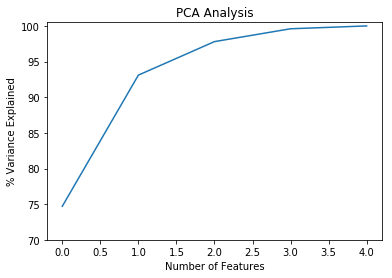

In [74]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 
def generate():

    pca = PCA(5,random_state =0)
    pca.fit(X)
    var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

    plt.ylabel('% Variance Explained')
    plt.xlabel('Number of Features')
    plt.title('PCA Analysis')
    plt.ylim(70,100.5)
    plt.style.context('seaborn-whitegrid')

    plt.plot(var)

    return plt.show()
generate()

In [76]:
from sklearn.decomposition import PCA
def generate():
    pca = PCA(n_components=5, random_state = 0)
    pca.fit(X)
    return pca.transform(X)
X = generate()
print(X.shape)

(150, 5)


In [77]:
from sklearn.model_selection import train_test_split
def generate():
    return train_test_split(X, y, test_size=0.25, random_state=1) 
X_train, X_test, y_train, y_test = generate()

In [78]:
print(X_train.shape,X_test.shape)

(112, 5) (38, 5)


In [79]:
import time
def generate():
    start_time = time.time()
    rfc.fit(X_train,y_train)
    end_time = time.time()
    time2 = end_time-start_time
    return time2
time2 = generate()

C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [80]:
print(time2)

19.39059281349182


In [81]:
predictions = pd.DataFrame()
def generate():
    predictions_pca = rfc.predict(X_test)
    return predictions_pca
predictions_pca = generate()

In [82]:
from sklearn.metrics import accuracy_score
def generate():
    print('Accuracy score for test data is:',accuracy_score(y_test, predictions_pca))
generate()

Accuracy score for test data is: 0.9736842105263158


In [83]:
def generate():
    return time2/time1
time_difference = generate()
print(time_difference)

0.8895481643384991
